/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning:


The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.



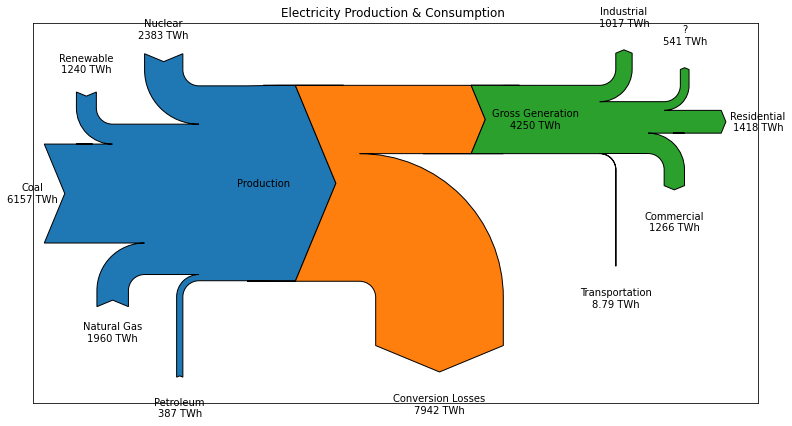

In [87]:
#import libraries
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import plotly

fig = plt.figure(figsize = (13, 7), frameon = False)
ax = fig.add_subplot(1, 1, 1, xticks = [], yticks = [], title='Electricity Production & Consumption '
                     )
g = [-12192, 6157, 1960, 387, 2383, 1240]              # generated
c = [4250, -7942, -1418, -1266, -1017, -8.79]          # consumed
sankey = Sankey(ax = ax, 
        format = '%.5G', 
        head_angle = 135,  
        unit = ' TWh', 
        gap = 0.3, 
        scale = 0.0001,
        margin = 0.0,
        offset = 0.2,
        shoulder = 0.0)

sankey.add(
    patchlabel = 'Production',
    flows = g,
    orientations = [0, 0, -1, -1, 1, 1], 
    labels = [None, 'Coal', 'Natural Gas', 'Petroleum', 'Nuclear', 'Renewable'],
    pathlengths = [0.0, 0.2, 0.2, 0.6, 0.2, 0.2]
    )

sankey.add(
    flows = [12192, -4250, -7942],
    orientations = [0, 0, -1],
    labels = [None, None, 'Conversion Losses'],
    pathlengths = [-.2, -.2, 0.4],
    # trunklength = 1.0,
    prior = 0,
    connect = (0, 0))       # denotes which flow index from the prior to connect to which flow index in this one

sankey.add(
    patchlabel = 'Gross Generation\n4250 TWh',
    flows = [4250, -1418, -1266, -1017, -8.79, -541],
    orientations = [0, 0, -1, 1, -1, 1],
    labels = [None, 'Residential', 'Commercial', 'Industrial', 'Transportation', '?'],
    prior = 1,
    pathlengths = [0.2, 0.2, 0.2, 0.2, 0.7, 0.2],
    # trunklength = 2.5,
    connect = (1, 0)
)


plt.savefig('./Electrical_Energy_Prod_Cons.png', 
                dpi = 300, 
                frameon = None,
                transparent = True,
                scale = 0.0001)

sankey.finish()
plt.show()




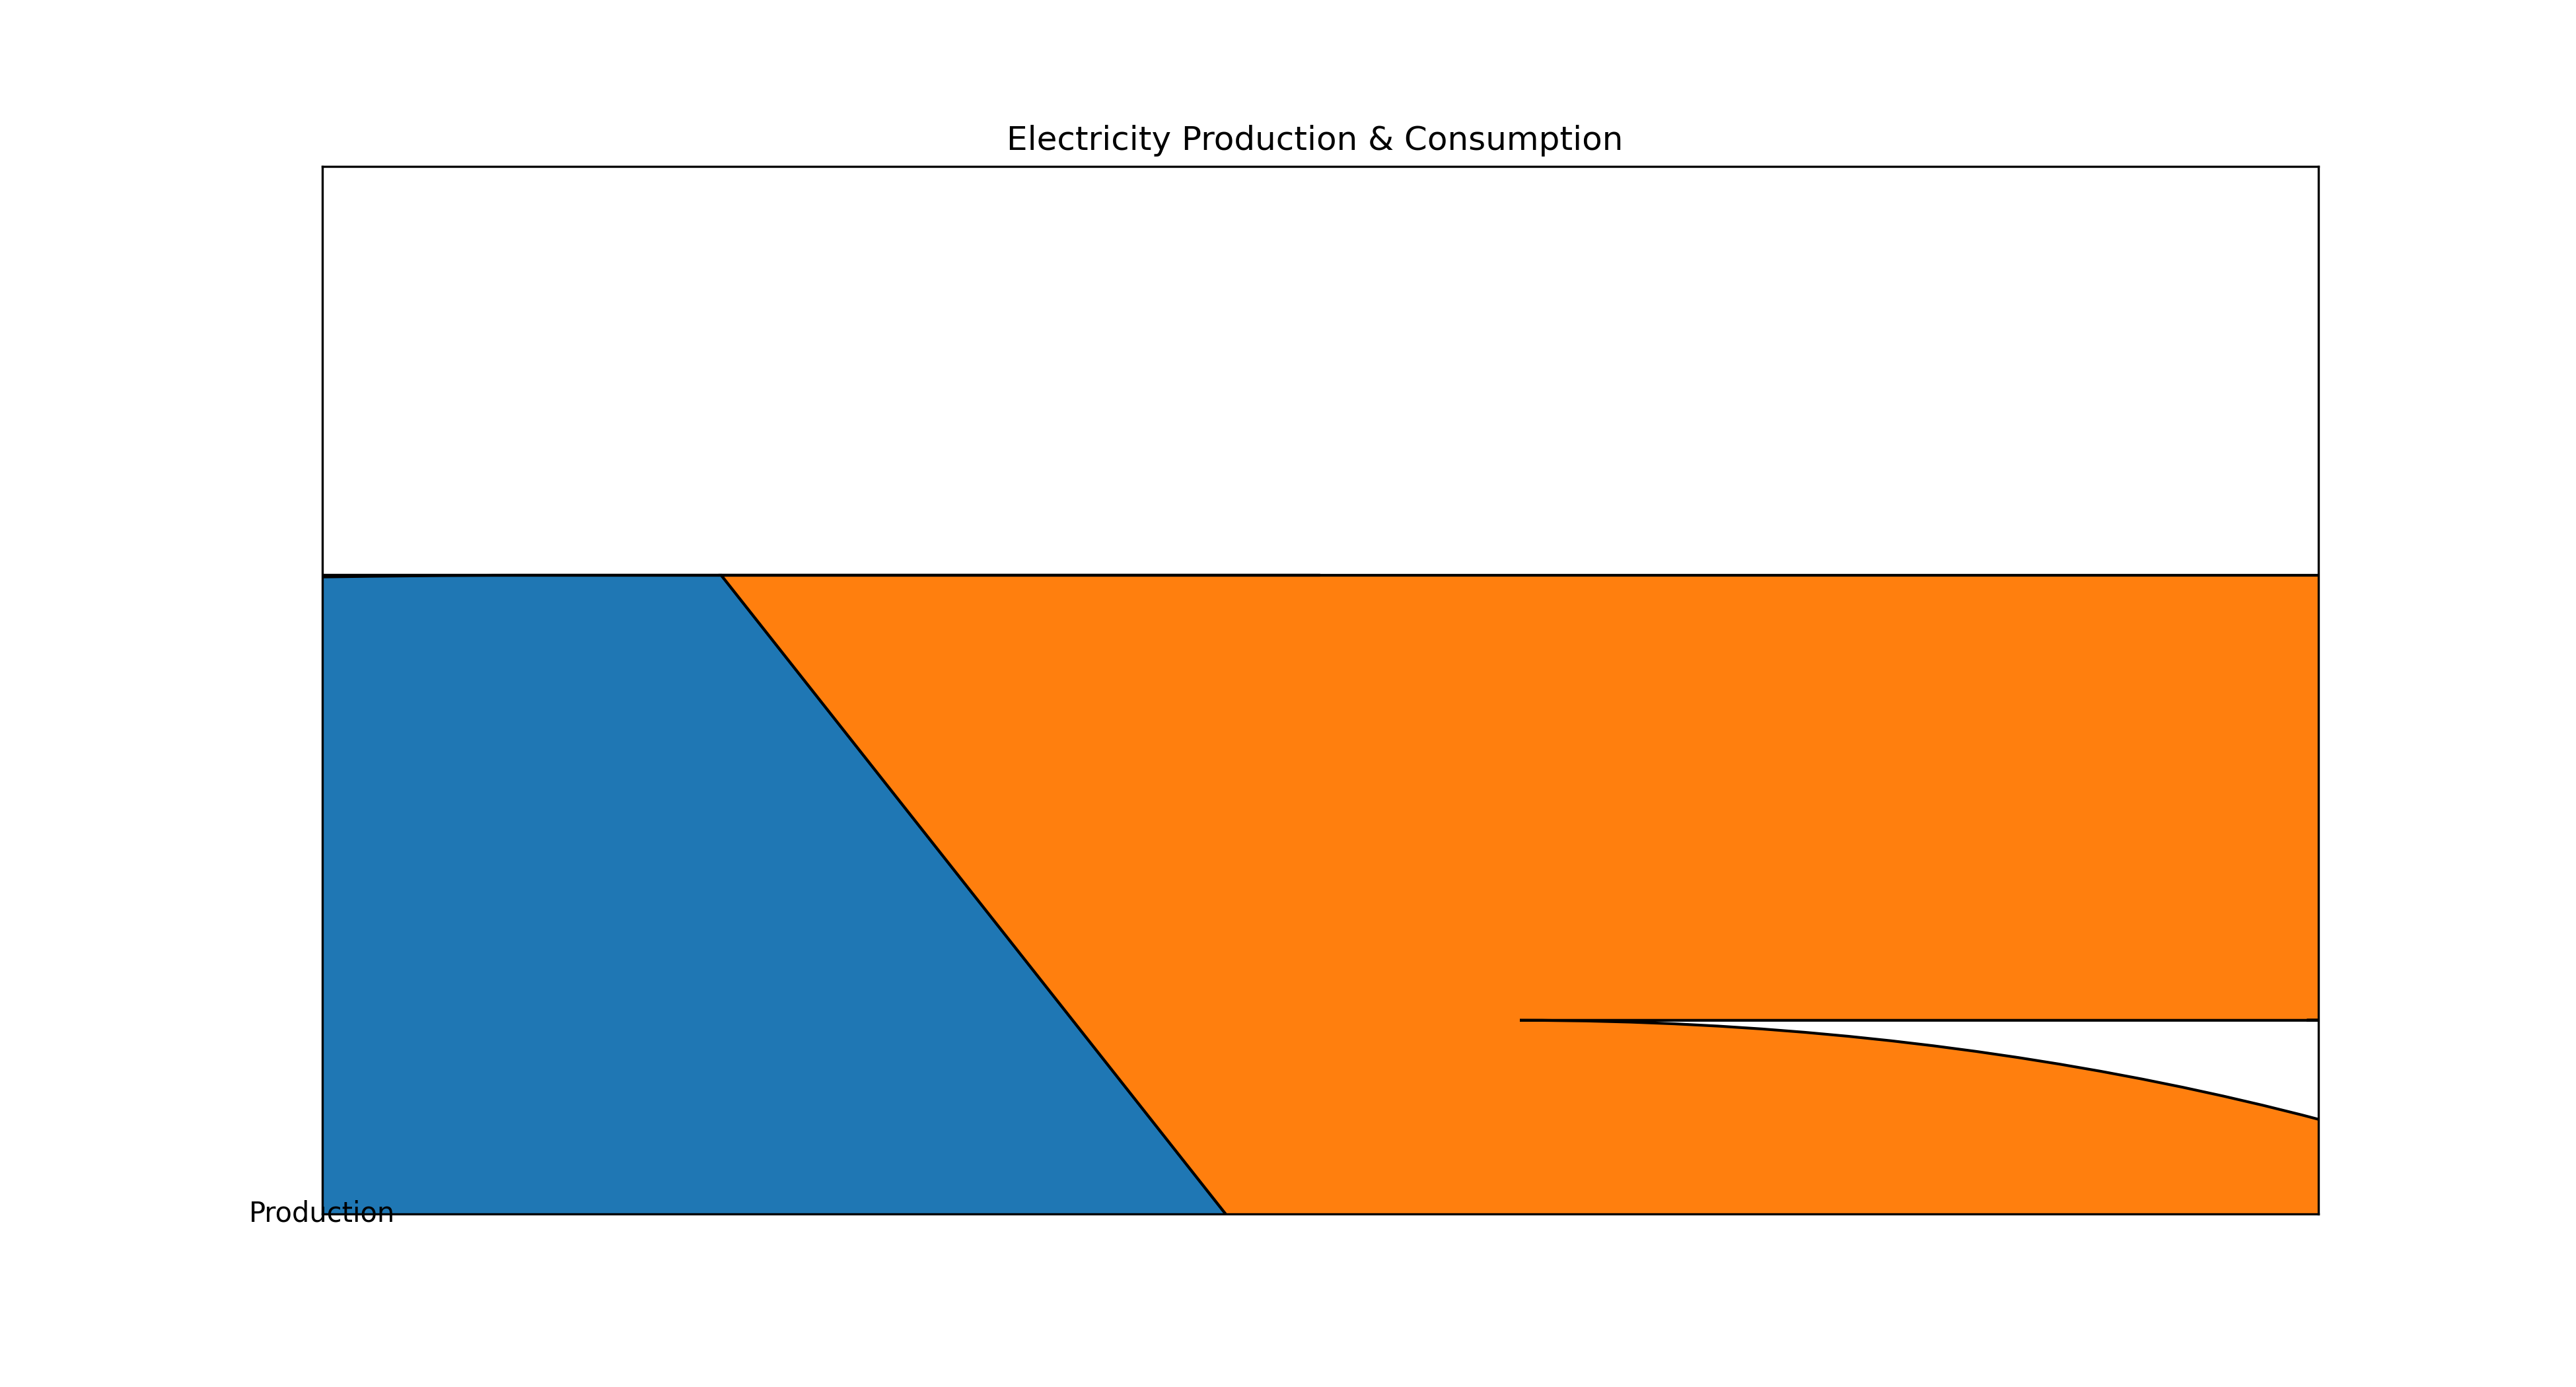

In [88]:
import base64
data_uri = base64.b64encode(open('Electrical_Energy_Prod_Cons.png', 'rb').read()).decode('utf-8')
img_tag = '<img src="data:image/png;base64,{0}">'.format(data_uri)
print(img_tag)

In [99]:
fig.savefig('img_tag.pdf')
fig.savefig('./Electrical_Energy_Prod_Cons.pdf')

In [89]:
import numpy as np
import pandas as pd
Video_games=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv.zip")
Video_games.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:

Video_games.keys()


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [80]:
X=Video_games.iloc[:,:4]
X


,Name,Platform,Year_of_Release,Genre
1,Super Mario Bros.,NES,1985.0,Platform
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing
5,Tetris,GB,1989.0,Puzzle
6,New Super Mario Bros.,DS,2006.0,Platform
9,Duck Hunt,NES,1984.0,Shooter
...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action
16715,LMA Manager 2007,X360,2006.0,Sports
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure
16717,Spirits & Spells,GBA,2003.0,Platform


In [81]:
Y=Video_games.iloc[:,5:10]
Y

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,29.08,3.58,6.81,0.77,40.24
4,11.27,8.89,10.22,1.00,31.37
5,23.20,2.26,4.22,0.58,30.26
6,11.28,9.14,6.50,2.88,29.80
9,26.93,0.63,0.28,0.47,28.31
...,...,...,...,...,...
16714,0.00,0.00,0.01,0.00,0.01
16715,0.00,0.01,0.00,0.00,0.01
16716,0.00,0.00,0.01,0.00,0.01
16717,0.01,0.00,0.00,0.00,0.01


In [84]:
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import plotly


fig = genSankey(Video_games,cat_cols=['JP_Sales','NA_Sales','Other_Sales','EU_Sales'],value_cols='Global_Sales',title='Video_Games_Sales')
plotly.offline.plot(fig, validate=False)



'temp-plot.html'